In [21]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from string import digits

# 1. 데이터 로드
df = pd.read_csv('Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [22]:

# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)



In [26]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((256, 4, 1), (256, 1), (65, 4, 1), (65, 1))

In [37]:
# 3. 시퀀스 생성
window = 4   # 최근 12개월 → 다음달 예측
X_train, y_train, X_test, y_test= [], [], [], []
for i in range(len(data)-window):
    X_train.append(data[i:i+window])
    y_train.append(data[i+window])
    X_test.append(data[i:i+window])
    y_test.append(data[i+window])
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)


In [38]:
modelRNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
modelRNN.compile(optimizer='adam', loss='mse')
modelRNN.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/Users/wagyum/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0124
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0156
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0100
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0099
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0094
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0115
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0103
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0115
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0094
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0113
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0091
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0098
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0105
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0092
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0091
Epoch 16/50
41/

In [39]:
# 4. LSTM 모델
modelLSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
modelLSTM.compile(optimizer='adam', loss='mse')
modelLSTM.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)



Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0634
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090
Epoch 16/50
41/41 ━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


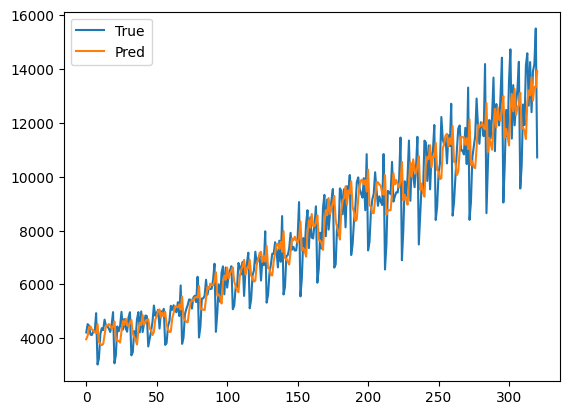

MSE: 0.008097623990301157


In [40]:
# 5. 예측
predRNN = modelRNN.predict(X_test)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(predRNN), label='Pred')
plt.legend(); plt.show()


mseRNN = np.mean((y_test - predRNN) ** 2)
print("MSE:", mseRNN)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


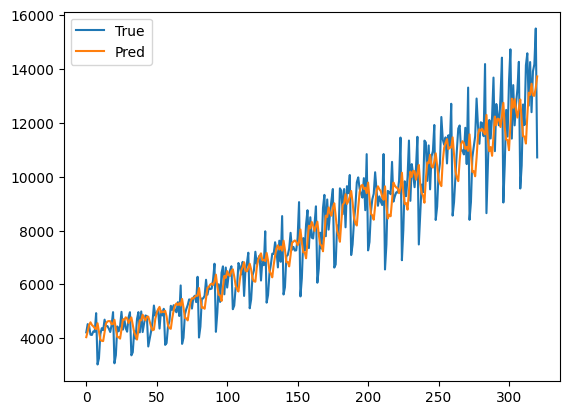

MSE: 0.00818352237591124


In [41]:
predLSTM = modelLSTM.predict(X_test)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(predLSTM), label='Pred')
plt.legend(); plt.show()


mseLSTM = np.mean((y_test - predLSTM) ** 2)
print("MSE:", mseLSTM)